# HMM Example

In [1]:
%matplotlib inline
import numpy as np
#1 downside, dep on how python env set up, can be difficult to install
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#transition probs
toSick = 0.001
toWell = 0.02

#normal dist emissions probs
model = GaussianHMM(n_components=2, covariance_type='tied')
#starting probs
model.startprob_ = np.array([1, 0]) # Healthy is 0, sick is 1
#transition probs
model.transmat_ = np.array([[1 - toSick, toSick], [toWell, 1 - toWell]])

print(model.transmat_)

#fill in observations (what emissions dist looks like)
model.means_ = np.reshape(np.array([98.6, 100.2]), (2, 1))
model._covars_ = np.array([[3]])

model._check()

[[0.999 0.001]
 [0.02  0.98 ]]


In [3]:
data, samm = model.sample(n_samples = 1000, random_state=4)

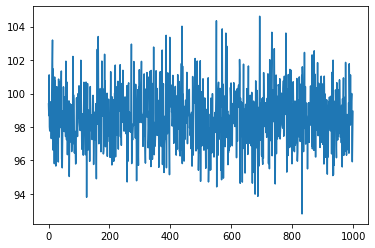

In [4]:
plt.plot(data);

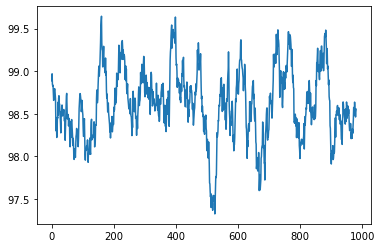

In [5]:
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    return np.convolve(np.squeeze(values), weights, 'valid')

plt.plot(movingaverage(data, 20));

In [6]:
# Make an HMM instance and execute fit
modelPred = GaussianHMM(n_components=2, n_iter=10000, tol=0.00001)


# Use EM to fit the parameters of a model
modelPred.fit(data);

# startprob_, transmat_, means_, _covars_
print(modelPred.means_)

[[98.43884589]
 [99.90478915]]


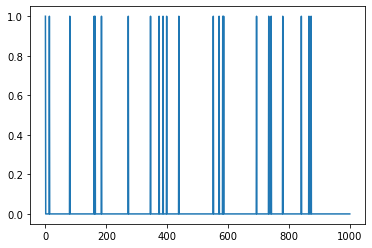

In [7]:
# Predict the optimal sequence of internal hidden state
hidden_states = modelPred.predict(data)

plt.plot(hidden_states);

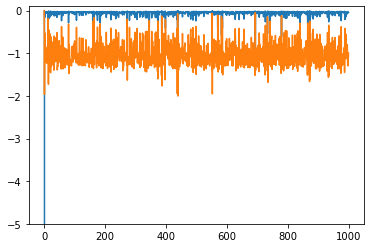

In [8]:
stateP = modelPred.predict_proba(data)

plt.plot(np.log10(stateP));
plt.ylim(-5, 0.1);

In [9]:
# How sure can we be a sickness event occured?
maxL = modelPred.score(data)

modelPredOne = GaussianHMM(n_components=1, n_iter=10000, tol=0.00001)
modelPredOne.fit(data)

wellL = modelPredOne.score(data)

print(maxL)
print(wellL)

-1968.1877956114713
-1970.4230776071176


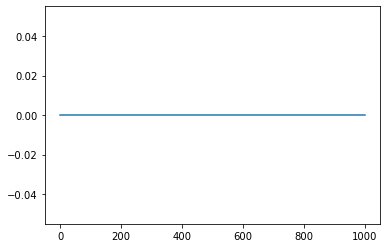

In [10]:
plt.plot(samm);